In [1]:
import numpy as np
import matplotlib.pyplot as plt


def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Arguments
    ---------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

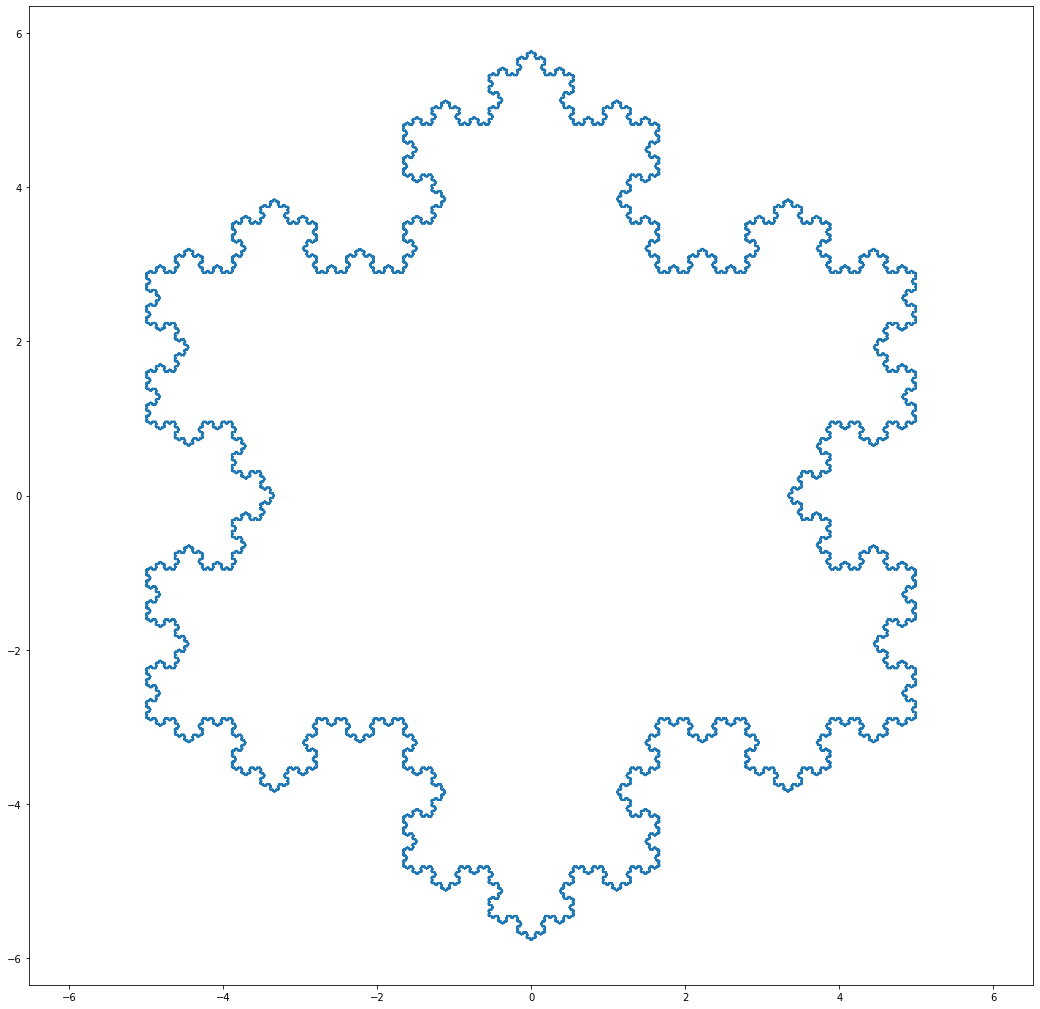

In [78]:
x, y = koch_snowflake(order=10)

plt.figure(figsize=(18, 18))
plt.axis('equal')
plt.plot(x,y)
plt.show()

In [67]:
xdata = np.random.random([2, 10])
xdata.sort(1)

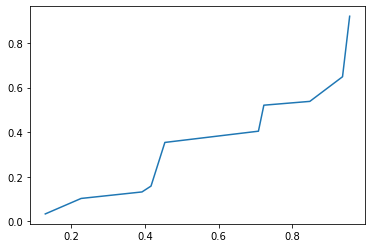

In [69]:
plt.plot(xdata[0],xdata[1])
plt.show()

In [62]:
x = xdata[0]

In [63]:
y = x.sort()

In [64]:
y

In [65]:
x

array([0.04794151, 0.16101821, 0.23722644, 0.32418002, 0.38893703,
       0.63297416, 0.74362113, 0.82394557, 0.90630365, 0.92237653])

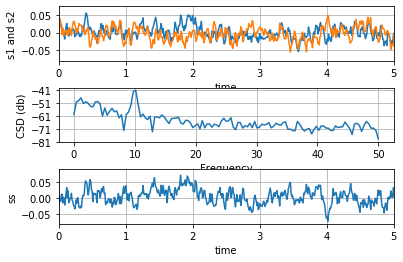

In [75]:
import numpy as np
import matplotlib.pyplot as plt


fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

dt = 0.01
t = np.arange(0, 30, dt)

# Fixing random state for reproducibility
np.random.seed(19680801)


nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t / 0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same') * dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2

ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)
ax1.set_xlabel('time')
ax1.set_ylabel('s1 and s2')
ax1.grid(True)

cxy, f = ax2.csd(s1, s2, 256, 1. / dt)
ax2.set_ylabel('CSD (db)')

ss = s1 - s2

ax3.plot(t, ss)
ax3.set_xlim(0, 5)
ax3.set_xlabel('time')
ax3.set_ylabel('ss')
ax3.grid(True)

plt.show()


In [76]:
sss = np.ff(s1)

plt.plot(sss)

AttributeError: module 'numpy' has no attribute 'ff'

In [79]:
import pandas as pd

In [84]:
data = pd.read_csv('data/test.csv')
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [85]:
data.shape

(418, 11)

In [102]:
age = data['Age']

In [103]:
age = age[~np.isnan(age)]

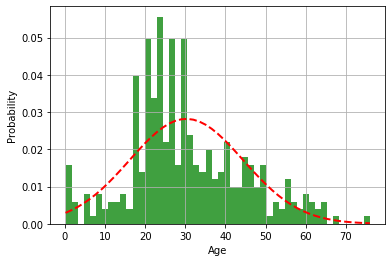

In [111]:
from scipy.stats import norm
import matplotlib.mlab as mlab
n, bins, patches = plt.hist(age, 50, density=True, facecolor='g', alpha=0.75)

(mu, sigma) = norm.fit(age)

# add a 'best fit' line
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Age')
plt.ylabel('Probability')
plt.grid(True)

plt.show()

In [115]:
fare = np.log(data['Fare'])

c:\program files\python37\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 6.238967387173662] is not finite

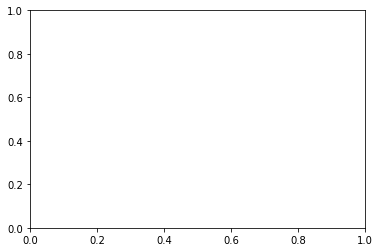

In [116]:
from scipy.stats import norm
import matplotlib.mlab as mlab
n, bins, patches = plt.hist(fare, 50, density=True, facecolor='b', alpha=0.75)

(mu, sigma) = norm.fit(fare)

# add a 'best fit' line
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Fare')
plt.ylabel('Probability')
plt.grid(True)

plt.show()